## Reading files

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import wilcoxon

In [2]:
results = pd.read_csv("./docs/selected.csv")
results = results.set_index("ID")

In [3]:
users = pd.read_csv("./docs/users.csv")

In [4]:
expl1 = pd.read_csv("./docs/selected_expl1.csv")
expl2 = pd.read_csv("./docs/selected_expl2.csv")
expl = pd.concat([expl1, expl2])

In [5]:
set(expl["ID"].unique()) == (set(results.index.unique()))

False

In [6]:
replace_v = {'Much More PEM': 2, 'More PEM': 1, 'Equal': 0, 'More ExpLOD': -1, 'Much More ExpLOD': -2}

## Analysis of user Questionnaire 

In [7]:
results.head()

,commentjust,commentrec,convincing,discover,diverse_on_a,diversity,popularity,time,trust,understood
ID,,,,,,,,,,
4221f534-a566-4fe1-af3b-2e73067a521c,NaN,"""I've already watched 4 of the 5 recommended m...",More B,Much More B,0,More A,More B,Tue Apr 18 2023 10:05:30 GMT-0300 (Brasilia St...,More B,More B
3cdae0e0-3b22-46f3-a286-f502d2115f80,NaN,NaN,Much More A,Much More A,0,Much More A,Much More A,Thu Apr 20 2023 16:28:55 GMT-0300 (Horário Pad...,Much More A,Much More A
8865717f-1ee0-4efb-a09b-e1173e28cf04,"""If I consider 2 justifications, it seems it w...","""I did not like the recommendations """,Equal,Equal,1,Equal,Equal,Thu Apr 13 2023 12:11:57 GMT-0300 (Horário Pad...,Equal,Equal
7d6d6774-c7b1-49c4-b4e4-c62bfd4588d1,NaN,NaN,More B,Equal,0,Much More B,More A,Sat Apr 22 2023 16:43:17 GMT-0300 (Horário Pad...,More B,More B
b4d1204b-42cf-4a56-b0f7-6813795a2923,NaN,NaN,Equal,Much More B,1,More A,More A,Sat Apr 22 2023 16:25:25 GMT-0300 (Horário Pad...,More B,More B


In [8]:
len(results.index.unique())

55

In [9]:
metric_cols = ["convincing", "discover", "diversity", "popularity", "trust", "understood"]

In [10]:
results_a = results[results['diverse_on_a'] == 1]
results_b = results[results['diverse_on_a'] == 0]

In [11]:
results_a = results_a[metric_cols]
results_b = results_b[metric_cols]

In [12]:
len(results_a.index.unique())

26

In [13]:
len(results_b.index.unique())

29

In [14]:
results_a.head()

,convincing,discover,diversity,popularity,trust,understood
ID,,,,,,
8865717f-1ee0-4efb-a09b-e1173e28cf04,Equal,Equal,Equal,Equal,Equal,Equal
b4d1204b-42cf-4a56-b0f7-6813795a2923,Equal,Much More B,More A,More A,More B,More B
277ace42-bf8e-4af7-82a2-f2a98ffdad95,Equal,Equal,More B,Equal,Equal,More B
ee8986ab-7ee0-4349-b578-710a33058958,Equal,More B,Equal,More B,Equal,Equal
42aab9b2-db24-421f-ace6-4564397942ae,More B,More A,Equal,More A,More B,More B


In [15]:
results_b.head()

,convincing,discover,diversity,popularity,trust,understood
ID,,,,,,
4221f534-a566-4fe1-af3b-2e73067a521c,More B,Much More B,More A,More B,More B,More B
3cdae0e0-3b22-46f3-a286-f502d2115f80,Much More A,Much More A,Much More A,Much More A,Much More A,Much More A
7d6d6774-c7b1-49c4-b4e4-c62bfd4588d1,More B,Equal,Much More B,More A,More B,More B
73154f98-a5ae-4b38-9202-e688a0a86e28,More A,More B,More A,More A,More A,More A
b7d90b39-7606-47bf-8552-d8670e7e015a,More A,More A,Equal,More B,Much More A,More B


In [16]:
replace_a = {'More A': 'More PEM', 'Much More A': 'Much More PEM', 'More B': 'More ExpLOD', 'Much More B': 'Much More ExpLOD'}
replace_b = {'More B': 'More PEM', 'Much More B': 'Much More PEM', 'More A': 'More ExpLOD', 'Much More A': 'Much More ExpLOD'}

In [17]:
results_repla = results_a.replace(replace_a)
results_replb = results_b.replace(replace_b)

In [18]:
results_repla

,convincing,discover,diversity,popularity,trust,understood
ID,,,,,,
8865717f-1ee0-4efb-a09b-e1173e28cf04,Equal,Equal,Equal,Equal,Equal,Equal
b4d1204b-42cf-4a56-b0f7-6813795a2923,Equal,Much More ExpLOD,More PEM,More PEM,More ExpLOD,More ExpLOD
277ace42-bf8e-4af7-82a2-f2a98ffdad95,Equal,Equal,More ExpLOD,Equal,Equal,More ExpLOD
ee8986ab-7ee0-4349-b578-710a33058958,Equal,More ExpLOD,Equal,More ExpLOD,Equal,Equal
42aab9b2-db24-421f-ace6-4564397942ae,More ExpLOD,More PEM,Equal,More PEM,More ExpLOD,More ExpLOD
1cf52f56-d06f-4f56-9b6c-3894edeb795b,More PEM,Equal,More PEM,More ExpLOD,More PEM,More PEM
26bbc9a9-86bb-4974-a1b5-6601b511ba4d,More ExpLOD,Equal,Equal,More ExpLOD,More ExpLOD,More ExpLOD
c6b8f3a6-e89d-40c7-9d65-e58bd693d299,More PEM,More ExpLOD,Much More PEM,Much More PEM,More PEM,More PEM
2d7fa883-3b29-4bd3-b592-54fc656a68bc,More PEM,More ExpLOD,More PEM,Equal,Equal,More ExpLOD


In [19]:
results_replb

,convincing,discover,diversity,popularity,trust,understood
ID,,,,,,
4221f534-a566-4fe1-af3b-2e73067a521c,More PEM,Much More PEM,More ExpLOD,More PEM,More PEM,More PEM
3cdae0e0-3b22-46f3-a286-f502d2115f80,Much More ExpLOD,Much More ExpLOD,Much More ExpLOD,Much More ExpLOD,Much More ExpLOD,Much More ExpLOD
7d6d6774-c7b1-49c4-b4e4-c62bfd4588d1,More PEM,Equal,Much More PEM,More ExpLOD,More PEM,More PEM
73154f98-a5ae-4b38-9202-e688a0a86e28,More ExpLOD,More PEM,More ExpLOD,More ExpLOD,More ExpLOD,More ExpLOD
b7d90b39-7606-47bf-8552-d8670e7e015a,More ExpLOD,More ExpLOD,Equal,More PEM,Much More ExpLOD,More PEM
282ef334-b2de-4873-b8c0-e6e94b9777e2,Equal,Equal,Equal,Equal,Equal,Equal
d119bb66-0100-4517-8d68-0eb4a95b5a60,Much More PEM,Much More PEM,Much More PEM,More ExpLOD,More PEM,Much More PEM
e22a42d5-fd97-4040-b6ef-292b90521125,Much More ExpLOD,More ExpLOD,More ExpLOD,Much More ExpLOD,More ExpLOD,More ExpLOD
1cdedd0e-ada1-4901-9443-b9fe73ee4eaf,More ExpLOD,More PEM,More PEM,More ExpLOD,More ExpLOD,More ExpLOD


In [20]:
def stats_rel(df, col):
    df = df.replace(replace_v)

    print(f"Statistical Test for {col}")
    stat, p = wilcoxon(df[col], alternative="two-sided")

    print("Wilcoxon statistic:", stat)
    print("p-value:", p)

    alpha = 0.05
    if p < alpha:
        print("Significant preference for one algorithm (reject H0)")
    else:
        print("No significant preference (fail to reject H0)")

    print(f"----")

In [21]:
results_all = pd.concat([results_repla, results_replb])
for c in results_all.columns:
    stats_rel(results_all, c)

Statistical Test for convincing
Wilcoxon statistic: 406.0
p-value: 0.953863581875635
No significant preference (fail to reject H0)
----
Statistical Test for discover
Wilcoxon statistic: 221.0
p-value: 0.38883876742336154
No significant preference (fail to reject H0)
----
Statistical Test for diversity
Wilcoxon statistic: 282.5
p-value: 0.06326699797855284
No significant preference (fail to reject H0)
----
Statistical Test for popularity
Wilcoxon statistic: 296.0
p-value: 0.10340377676901528
No significant preference (fail to reject H0)
----
Statistical Test for trust
Wilcoxon statistic: 344.0
p-value: 0.6753773814146983
No significant preference (fail to reject H0)
----
Statistical Test for understood
Wilcoxon statistic: 406.0
p-value: 0.953863581875635
No significant preference (fail to reject H0)
----


C:\Users\andre\AppData\Local\Temp\ipykernel_14100\783916048.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(replace_v)


In [22]:
def quest_results(column):
    df_a = results_repla[column].value_counts()
    df_b = results_replb[column].value_counts()
    df_final = pd.DataFrame(columns=['count'])
    for c in df_a.index.union(df_b.index):
        if c not in df_a.index:
            df_final.loc[c] = df_b[c]
        elif c not in df_b.index:
            df_final.loc[c] = df_a[c]
        elif c not in df_a.index and c not in df_b.index:
            df_final.loc[c] = 0
        else:
            df_final.loc[c] = df_a[c] + df_b[c]
    return df_final

In [23]:
quest_results('convincing').sort_values('count', ascending=False)

,count
More PEM,20
Equal,15
More ExpLOD,13
Much More ExpLOD,5
Much More PEM,2


In [24]:
quest_results('diversity').sort_values('count', ascending=False)

,count
More PEM,20
Equal,15
More ExpLOD,14
Much More PEM,5
Much More ExpLOD,1


In [25]:
quest_results('popularity').sort_values('count', ascending=False)

,count
More ExpLOD,17
Equal,15
More PEM,14
Much More ExpLOD,7
Much More PEM,2


In [26]:
quest_results('trust').sort_values('count', ascending=False)

,count
Equal,17
More ExpLOD,17
More PEM,16
Much More ExpLOD,3
Much More PEM,2


In [27]:
a = quest_results('trust').sort_values('count', ascending=False).T.reset_index().drop(columns="index")
a["Category"] = 'Trust'
a.iloc[0]

Equal                  17
More ExpLOD            17
More PEM               16
Much More ExpLOD        3
Much More PEM           2
Category            Trust
Name: 0, dtype: object

In [28]:
quest_results('understood').sort_values('count', ascending=False)

,count
More ExpLOD,20
Equal,15
More PEM,13
Much More PEM,5
Much More ExpLOD,2


In [29]:
quest_results('discover').sort_values('count', ascending=False)

,count
Equal,23
More PEM,14
More ExpLOD,12
Much More PEM,4
Much More ExpLOD,2


In [30]:
df2 = pd.DataFrame(columns=['Category', 'Equal', 'More ExpLOD', 'More PEM', 'Much More ExpLOD',
       'Much More PEM'])

a = quest_results('diversity').sort_values('count', ascending=False).T.reset_index().drop(columns="index")
a["Category"] = 'Diversity'
df2.loc[len(df2)] = a.iloc[0]

a = quest_results('popularity').sort_values('count', ascending=False).T.reset_index().drop(columns="index")
a["Category"] = 'Popularity'
df2.loc[len(df2)] = a.iloc[0]

a = quest_results('understood').sort_values('count', ascending=False).T.reset_index().drop(columns="index")
a["Category"] = 'Transparency'
df2.loc[len(df2)] = a.iloc[0]

a = quest_results('discover').sort_values('count', ascending=False).T.reset_index().drop(columns="index")
a["Category"] = 'Engagement'
df2.loc[len(df2)] = a.iloc[0]

a = quest_results('trust').sort_values('count', ascending=False).T.reset_index().drop(columns="index")
a["Category"] = 'Trust'
df2.loc[len(df2)] = a.iloc[0]

a = quest_results('convincing').sort_values('count', ascending=False).T.reset_index().drop(columns="index")
a["Category"] = 'Persuasiveness'
df2.loc[len(df2)] = a.iloc[0]

df2

,Category,Equal,More ExpLOD,More PEM,Much More ExpLOD,Much More PEM
0,Diversity,15,14,20,1,5
1,Popularity,15,17,14,7,2
2,Transparency,15,20,13,2,5
3,Engagement,23,12,14,2,4
4,Trust,17,17,16,3,2
5,Persuasiveness,15,13,20,5,2


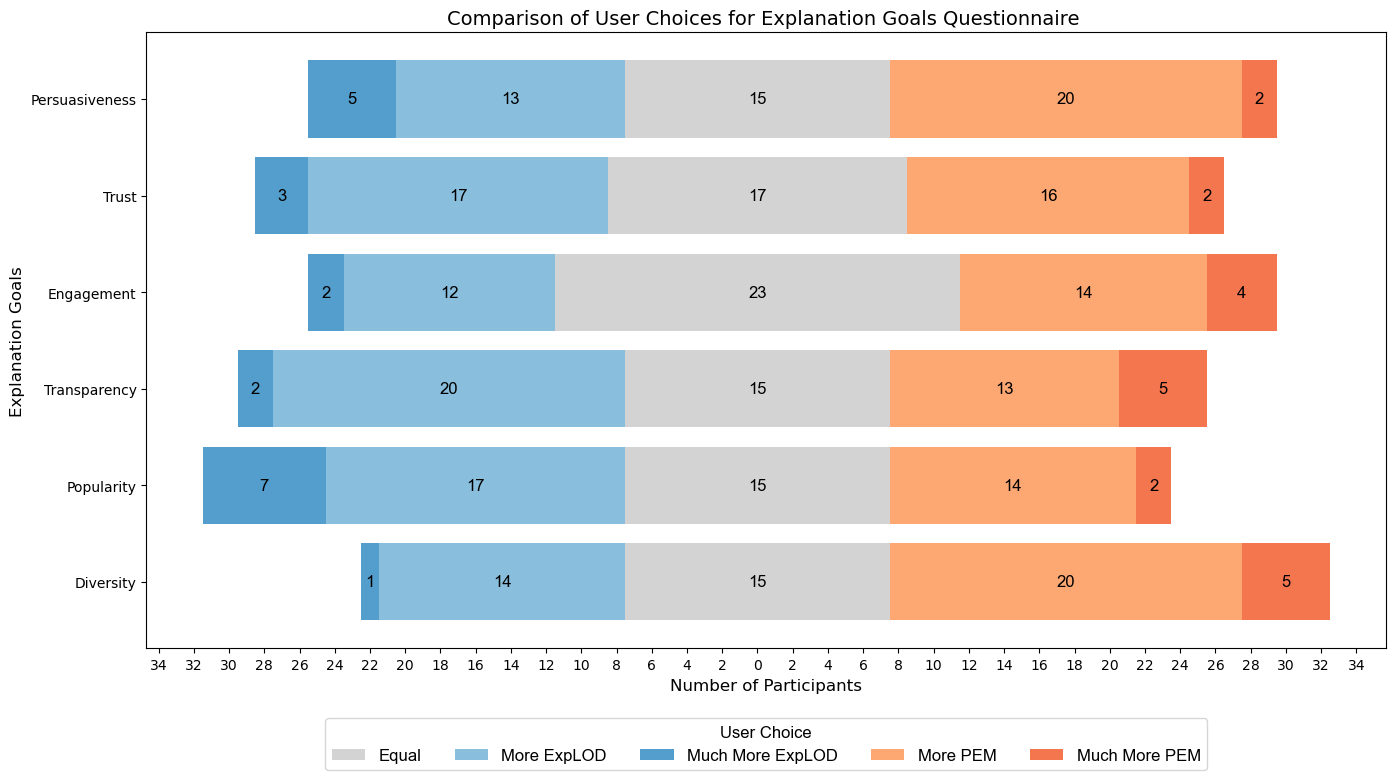

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set up figure
fig, ax = plt.subplots(figsize=(16, 8))
plt.rcParams.update({"font.family": "Arial"}) 
plt.rcParams.update({
    "axes.titlesize": 14,    # Title size
    "axes.labelsize": 14,    # X & Y labels
    "xtick.labelsize": 12,   # X tick labels
    "ytick.labelsize": 12,   # Y tick labels
    "legend.title_fontsize": 12,  # Legend title size
    "legend.fontsize": 12    # Legend labels size
})

# Compute values for left (Group A) and right (Group B)
left_Equal_values = -df2["Equal"].values / 2  # Half of Equal goes on A side
right_Equal_values = df2["Equal"].values / 2  # Half of Equal goes on B side

left_A_values = -df2["More ExpLOD"].values
far_left_A_values = -df2["Much More ExpLOD"].values

right_B_values = df2["More PEM"].values
far_right_B_values = df2["Much More PEM"].values  

# Sample Data: Two groups + "Equal" category
maximum = round(max(max(abs(left_A_values) + left_Equal_values), max(abs(right_B_values) + right_Equal_values))) / 2 * 2
maximum = int(maximum) + 2
group_A = np.array([i for i in range(0, maximum, 2)])   # Group A values
group_B = np.array([i for i in range(0, maximum, 2)])   # Group B values
equal =  np.array([i for i in range(0, maximum, 2)])     # Equal values (split between A & B)

bars_left_equal = ax.barh(df2["Category"], left_Equal_values, color="lightgray", label="Equal")
bars_left_A = ax.barh(df2["Category"], left_A_values, color=sns.color_palette(palette='Blues').as_hex()[:][2], label="More ExpLOD", left=left_Equal_values)
far_bars_left_A = ax.barh(df2["Category"], far_left_A_values, color=sns.color_palette(palette='Blues').as_hex()[:][3], label="Much More ExpLOD", left=left_A_values + left_Equal_values)

# Plot Equal (right side, gray) at the bottom
bars_right_equal = ax.barh(df2["Category"], right_Equal_values, color="lightgray")
bars_right_B = ax.barh(df2["Category"], right_B_values, color=sns.color_palette(palette='OrRd').as_hex()[:][2], label="More PEM", left=right_Equal_values)
far_bars_right_B = ax.barh(df2["Category"], far_right_B_values, color=sns.color_palette(palette='OrRd').as_hex()[:][3], label="Much More PEM", left=right_B_values + right_Equal_values)

# Labels and Title
ax.set_xlabel("Number of Participants", fontsize=12)
ax.set_ylabel("Explanation Goals", fontsize=12)
ax.set_title("Comparison of User Choices for Explanation Goals Questionnaire ")

xticks = np.arange(-maximum - 4, maximum + 6, 2)  
ax.set_xticks(xticks)
ax.set_xticklabels([abs(x) for x in xticks]) 

all_bars = [bars_left_equal, bars_right_equal, bars_left_A, bars_right_B, far_bars_left_A, far_bars_right_B]
for i in range(0, len(all_bars)):
    bars = all_bars[i]
    for bar in bars:
        if i == 0 or i ==1:
            if i == 1:
                continue
            width = bar.get_width() * 2  # Get the length of the bar
            x_position = 0  # Center label inside the bar
            y_position = bar.get_y() + bar.get_height() / 2  # Center vertically

            value = int(abs(width))  # Convert width to positive value for label
            if value > 0:
                ax.text(x_position, y_position, f"{value}", ha="center", va="center", 
                        color="white" if "gray" in bar.get_facecolor() else "black", 
                        fontsize=12)
                
        else:
            width = bar.get_width()  # Get the length of the bar
            x_position = bar.get_x() + width / 2  # Center label inside the bar
            y_position = bar.get_y() + bar.get_height() / 2  # Center vertically

            value = int(abs(width))  # Convert width to positive value for label
            if value > 0:
                ax.text(x_position, y_position, f"{value}", ha="center", va="center", 
                        color="white" if "gray" in bar.get_facecolor() else "black", 
                        fontsize=12)

# Show Plot
ax.legend(title="User Choice", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.show()


In [32]:
expl1 = pd.read_csv("./docs/selected_expl1.csv")
expl2 = pd.read_csv("./docs/selected_expl2.csv")
expl = pd.concat([expl1, expl2])
expl = expl.set_index('ID')

In [33]:
end_expl = expl.loc[results.index]
end_expl.head()

,movie_id,explod_expl,pem_expl,score,time,title
ID,,,,,,
4221f534-a566-4fe1-af3b-2e73067a521c,1089,"""Like the movies """"Kill Bill Volume 1"""" and """"...","""Like the movie """"Kill Bill Volume 1"""" and """"K...",0.161457,Tue Apr 18 2023 09:59:03 GMT-0300 (Brasilia St...,Reservoir Dogs
4221f534-a566-4fe1-af3b-2e73067a521c,1193,"""Like the movies """"Braveheart"""" and """"Taxi Dri...","""Like the movie """"The Godfather"""" and """"Braveh...",0.169536,Tue Apr 18 2023 09:59:03 GMT-0300 (Brasilia St...,One Flew Over the Cuckoo's Nest
4221f534-a566-4fe1-af3b-2e73067a521c,1213,"""Like the movies """"A Clockwork Orange"""" and """"...","""Like the movie """"The Godfather"""" that has the...",0.140909,Tue Apr 18 2023 09:59:03 GMT-0300 (Brasilia St...,Goodfellas
4221f534-a566-4fe1-af3b-2e73067a521c,1221,"""Like the movies """"A Clockwork Orange"""" and """"...","""Like the movie """"The Godfather"""" that has the...",0.143565,Tue Apr 18 2023 09:59:03 GMT-0300 (Brasilia St...,The Godfather Part II
4221f534-a566-4fe1-af3b-2e73067a521c,1258,"""Like the movies """"A Clockwork Orange"""" and """"...","""Like the movie """"A Clockwork Orange"""" that ha...",0.146796,Tue Apr 18 2023 09:59:03 GMT-0300 (Brasilia St...,The Shining


In [34]:
end_expl['explod_expl'].head()

ID
4221f534-a566-4fe1-af3b-2e73067a521c    "Like the movies ""Kill Bill Volume 1"" and ""...
4221f534-a566-4fe1-af3b-2e73067a521c    "Like the movies ""Braveheart"" and ""Taxi Dri...
4221f534-a566-4fe1-af3b-2e73067a521c    "Like the movies ""A Clockwork Orange"" and ""...
4221f534-a566-4fe1-af3b-2e73067a521c    "Like the movies ""A Clockwork Orange"" and ""...
4221f534-a566-4fe1-af3b-2e73067a521c    "Like the movies ""A Clockwork Orange"" and ""...
Name: explod_expl, dtype: object

In [35]:
len(end_expl.index.unique())

55

In [36]:
end_expl['expl_prop'] = end_expl.apply(lambda row : row['explod_expl'].split("watch")[0].split('that')[-1], axis = 1) 

In [37]:
end_expl['pem_prop'] = end_expl.apply(lambda row : row['pem_expl'].split("watch")[0].split('that')[-1], axis = 1) 

In [38]:
end_expl_count = end_expl.reset_index().groupby(['ID', 'expl_prop']).count()

In [39]:
end_expl_count_final = end_expl_count.groupby('ID').count()
end_expl_count_final

,movie_id,explod_expl,pem_expl,score,time,title,pem_prop
ID,,,,,,,
0903e4d7-0117-43ac-9ba1-67a34ee4f584,3,3,3,3,3,3,3
16497ee9-9f63-4ac3-8cba-ca821cd434cc,4,4,4,4,4,4,4
1670be4a-56a4-401b-a64a-ea8490643f1d,3,3,3,3,3,3,3
199a272e-eb22-4ae2-95fb-dd14c4fa208e,2,2,2,2,2,2,2
1cdedd0e-ada1-4901-9443-b9fe73ee4eaf,5,5,5,5,5,5,5
1cf52f56-d06f-4f56-9b6c-3894edeb795b,4,4,4,4,4,4,4
26bbc9a9-86bb-4974-a1b5-6601b511ba4d,4,4,4,4,4,4,4
2763ffe6-f1c6-4021-b053-e1323d9d0989,2,2,2,2,2,2,2
277ace42-bf8e-4af7-82a2-f2a98ffdad95,3,3,3,3,3,3,3


In [40]:
end_expl_count_final = end_expl_count_final['movie_id']
end_expl_count_final

ID
0903e4d7-0117-43ac-9ba1-67a34ee4f584    3
16497ee9-9f63-4ac3-8cba-ca821cd434cc    4
1670be4a-56a4-401b-a64a-ea8490643f1d    3
199a272e-eb22-4ae2-95fb-dd14c4fa208e    2
1cdedd0e-ada1-4901-9443-b9fe73ee4eaf    5
1cf52f56-d06f-4f56-9b6c-3894edeb795b    4
26bbc9a9-86bb-4974-a1b5-6601b511ba4d    4
2763ffe6-f1c6-4021-b053-e1323d9d0989    2
277ace42-bf8e-4af7-82a2-f2a98ffdad95    3
282ef334-b2de-4873-b8c0-e6e94b9777e2    4
2d7fa883-3b29-4bd3-b592-54fc656a68bc    3
2fff537b-f60f-4762-a300-e651a85c83e7    3
330036ae-330c-4fff-b455-ff819ae8adec    1
33db9956-4b5b-47ab-b3d1-6f76c42384f7    2
37080dca-b8d4-432b-8577-ee2966dfa206    3
3887e896-3fa0-477d-be09-af967ba31f91    2
38cdc324-2d9a-42c4-b2f3-44448d149cc4    1
3cdae0e0-3b22-46f3-a286-f502d2115f80    3
4221f534-a566-4fe1-af3b-2e73067a521c    4
42aab9b2-db24-421f-ace6-4564397942ae    4
4d1107a0-b627-4a84-a05c-f80b4132fb32    5
4d5557e0-f952-47ac-9592-ee5d08ea8ff1    3
537542f2-31b4-4ab6-a6ef-25fed9d64258    3
5efdbde1-5292-492b-b951-b97cb2c

In [41]:
end_expl_count_final.mean()

3.090909090909091

In [42]:
ids = end_expl_count_final[end_expl_count_final >= 4].index
ids

Index(['16497ee9-9f63-4ac3-8cba-ca821cd434cc',
       '1cdedd0e-ada1-4901-9443-b9fe73ee4eaf',
       '1cf52f56-d06f-4f56-9b6c-3894edeb795b',
       '26bbc9a9-86bb-4974-a1b5-6601b511ba4d',
       '282ef334-b2de-4873-b8c0-e6e94b9777e2',
       '4221f534-a566-4fe1-af3b-2e73067a521c',
       '42aab9b2-db24-421f-ace6-4564397942ae',
       '4d1107a0-b627-4a84-a05c-f80b4132fb32',
       '73154f98-a5ae-4b38-9202-e688a0a86e28',
       '8865717f-1ee0-4efb-a09b-e1173e28cf04',
       '8e5115a8-aee4-403a-a33a-81a9dc677d0c',
       '94cb0ad6-df69-4c3a-9df6-0d737a7c8add',
       '99a9b0db-5c2f-474a-b623-73b252e9ca1f',
       '9c577360-04b1-483a-a984-a02a2a2c4689',
       'b4d1204b-42cf-4a56-b0f7-6813795a2923',
       'bc9cb0c4-fd45-47d8-a975-5333691e2f9f',
       'd37720ea-fab8-4302-8674-808017d7bf1e',
       'dc9db4df-d42a-42cd-879a-e678a69ed5c7',
       'fb63a3e6-6944-4b0c-8cd1-64513f81f0ea'],
      dtype='object', name='ID')

In [43]:
len(ids)

19

In [44]:
end_pem_count = end_expl.reset_index().groupby(['ID', 'pem_prop']).count()
end_pem_count_final = end_pem_count.groupby('ID').count()
end_pem_count_final = end_pem_count_final['movie_id']
end_pem_count_final.mean()

4.8

In [45]:
results_repla = results_repla[results_repla.index.isin(ids)]
results_replb = results_replb.loc[results_replb.index.isin(ids)]

In [46]:
df2 = pd.DataFrame(columns=['Category', 'Equal', 'More ExpLOD', 'More PEM', 'Much More ExpLOD',
       'Much More PEM'])

a = quest_results('diversity').sort_values('count', ascending=False).T.reset_index().drop(columns="index")
a["Category"] = 'Diversity'
df2.loc[len(df2)] = a.iloc[0]

a = quest_results('popularity').sort_values('count', ascending=False).T.reset_index().drop(columns="index")
a["Category"] = 'Popularity'
df2.loc[len(df2)] = a.iloc[0]

a = quest_results('understood').sort_values('count', ascending=False).T.reset_index().drop(columns="index")
a["Category"] = 'Transparency'
df2.loc[len(df2)] = a.iloc[0]

a = quest_results('discover').sort_values('count', ascending=False).T.reset_index().drop(columns="index")
a["Category"] = 'Engagement'
df2.loc[len(df2)] = a.iloc[0]

a = quest_results('trust').sort_values('count', ascending=False).T.reset_index().drop(columns="index")
a["Category"] = 'Trust'
df2.loc[len(df2)] = a.iloc[0]

a = quest_results('convincing').sort_values('count', ascending=False).T.reset_index().drop(columns="index")
a["Category"] = 'Persuasiveness'
df2.loc[len(df2)] = a.iloc[0]

df2

,Category,Equal,More ExpLOD,More PEM,Much More ExpLOD,Much More PEM
0,Diversity,5,6,7,NaN,1
1,Popularity,5,7,4,2,1
2,Transparency,3,10,3,NaN,3
3,Engagement,8,4,5,1,1
4,Trust,3,10,4,1,1
5,Persuasiveness,5,7,4,2,1


In [47]:
with pd.option_context("future.no_silent_downcasting", True):
    df2 = df2.fillna(0)
df2

,Category,Equal,More ExpLOD,More PEM,Much More ExpLOD,Much More PEM
0,Diversity,5,6,7,0,1
1,Popularity,5,7,4,2,1
2,Transparency,3,10,3,0,3
3,Engagement,8,4,5,1,1
4,Trust,3,10,4,1,1
5,Persuasiveness,5,7,4,2,1


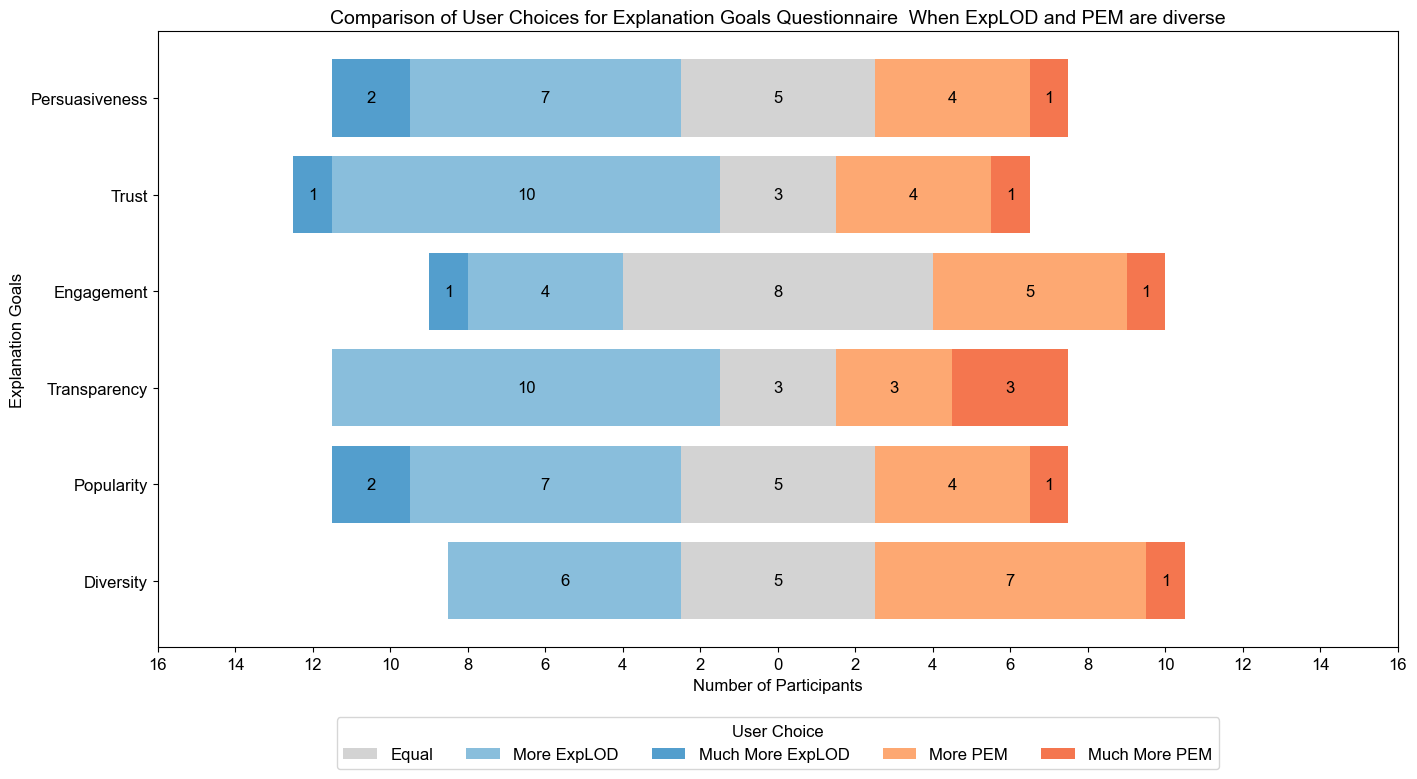

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set up figure
fig, ax = plt.subplots(figsize=(16, 8))
plt.rcParams.update({"font.family": "Arial"}) 
plt.rcParams.update({
    "axes.titlesize": 14,    # Title size
    "axes.labelsize": 14,    # X & Y labels
    "xtick.labelsize": 12,   # X tick labels
    "ytick.labelsize": 12,   # Y tick labels
    "legend.title_fontsize": 12,  # Legend title size
    "legend.fontsize": 12    # Legend labels size
})

# Compute values for left (Group A) and right (Group B)
left_Equal_values = -df2["Equal"].values / 2  # Half of Equal goes on A side
right_Equal_values = df2["Equal"].values / 2  # Half of Equal goes on B side

left_A_values = -df2["More ExpLOD"].values
far_left_A_values = -df2["Much More ExpLOD"].values

right_B_values = df2["More PEM"].values
far_right_B_values = df2["Much More PEM"].values  

# Sample Data: Two groups + "Equal" category
maximum = round(max(max(abs(left_A_values) + left_Equal_values), max(abs(right_B_values) + right_Equal_values))) / 2 * 2
maximum = int(maximum) + 2
group_A = np.array([i for i in range(0, maximum, 2)])   # Group A values
group_B = np.array([i for i in range(0, maximum, 2)])   # Group B values
equal =  np.array([i for i in range(0, maximum, 2)])     # Equal values (split between A & B)

bars_left_equal = ax.barh(df2["Category"], left_Equal_values, color="lightgray", label="Equal")
bars_left_A = ax.barh(df2["Category"], left_A_values, color=sns.color_palette(palette='Blues').as_hex()[:][2], label="More ExpLOD", left=left_Equal_values)
far_bars_left_A = ax.barh(df2["Category"], far_left_A_values, color=sns.color_palette(palette='Blues').as_hex()[:][3], label="Much More ExpLOD", left=left_A_values + left_Equal_values)

# Plot Equal (right side, gray) at the bottom
bars_right_equal = ax.barh(df2["Category"], right_Equal_values, color="lightgray")
bars_right_B = ax.barh(df2["Category"], right_B_values, color=sns.color_palette(palette='OrRd').as_hex()[:][2], label="More PEM", left=right_Equal_values)
far_bars_right_B = ax.barh(df2["Category"], far_right_B_values, color=sns.color_palette(palette='OrRd').as_hex()[:][3], label="Much More PEM", left=right_B_values + right_Equal_values)

# Labels and Title
ax.set_xlabel("Number of Participants", fontsize=12)
ax.set_ylabel("Explanation Goals", fontsize=12)
ax.set_title("Comparison of User Choices for Explanation Goals Questionnaire  When ExpLOD and PEM are diverse")

xticks = np.arange(-maximum - 4, maximum + 6, 2)  
ax.set_xticks(xticks)
ax.set_xticklabels([abs(x) for x in xticks]) 

all_bars = [bars_left_equal, bars_right_equal, bars_left_A, bars_right_B, far_bars_left_A, far_bars_right_B]
for i in range(0, len(all_bars)):
    bars = all_bars[i]
    for bar in bars:
        if i == 0 or i ==1:
            if i == 1:
                continue
            width = bar.get_width() * 2  # Get the length of the bar
            x_position = 0  # Center label inside the bar
            y_position = bar.get_y() + bar.get_height() / 2  # Center vertically

            value = int(abs(width))  # Convert width to positive value for label
            if value > 0:
                ax.text(x_position, y_position, f"{value}", ha="center", va="center", 
                        color="white" if "gray" in bar.get_facecolor() else "black", 
                        fontsize=12)
                
        else:
            width = bar.get_width()  # Get the length of the bar
            x_position = bar.get_x() + width / 2  # Center label inside the bar
            y_position = bar.get_y() + bar.get_height() / 2  # Center vertically

            value = int(abs(width))  # Convert width to positive value for label
            if value > 0:
                ax.text(x_position, y_position, f"{value}", ha="center", va="center", 
                        color="white" if "gray" in bar.get_facecolor() else "black", 
                        fontsize=12)

# Show Plot
ax.legend(title="User Choice", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.show()


## Explanation Analysis

In [49]:
end_expl = expl.loc[results.index]
len(end_expl.index.unique())

55

In [50]:
end_expl.head()

,movie_id,explod_expl,pem_expl,score,time,title
ID,,,,,,
4221f534-a566-4fe1-af3b-2e73067a521c,1089,"""Like the movies """"Kill Bill Volume 1"""" and """"...","""Like the movie """"Kill Bill Volume 1"""" and """"K...",0.161457,Tue Apr 18 2023 09:59:03 GMT-0300 (Brasilia St...,Reservoir Dogs
4221f534-a566-4fe1-af3b-2e73067a521c,1193,"""Like the movies """"Braveheart"""" and """"Taxi Dri...","""Like the movie """"The Godfather"""" and """"Braveh...",0.169536,Tue Apr 18 2023 09:59:03 GMT-0300 (Brasilia St...,One Flew Over the Cuckoo's Nest
4221f534-a566-4fe1-af3b-2e73067a521c,1213,"""Like the movies """"A Clockwork Orange"""" and """"...","""Like the movie """"The Godfather"""" that has the...",0.140909,Tue Apr 18 2023 09:59:03 GMT-0300 (Brasilia St...,Goodfellas
4221f534-a566-4fe1-af3b-2e73067a521c,1221,"""Like the movies """"A Clockwork Orange"""" and """"...","""Like the movie """"The Godfather"""" that has the...",0.143565,Tue Apr 18 2023 09:59:03 GMT-0300 (Brasilia St...,The Godfather Part II
4221f534-a566-4fe1-af3b-2e73067a521c,1258,"""Like the movies """"A Clockwork Orange"""" and """"...","""Like the movie """"A Clockwork Orange"""" that ha...",0.146796,Tue Apr 18 2023 09:59:03 GMT-0300 (Brasilia St...,The Shining


In [51]:
end_expl['explod_expl'].head()

ID
4221f534-a566-4fe1-af3b-2e73067a521c    "Like the movies ""Kill Bill Volume 1"" and ""...
4221f534-a566-4fe1-af3b-2e73067a521c    "Like the movies ""Braveheart"" and ""Taxi Dri...
4221f534-a566-4fe1-af3b-2e73067a521c    "Like the movies ""A Clockwork Orange"" and ""...
4221f534-a566-4fe1-af3b-2e73067a521c    "Like the movies ""A Clockwork Orange"" and ""...
4221f534-a566-4fe1-af3b-2e73067a521c    "Like the movies ""A Clockwork Orange"" and ""...
Name: explod_expl, dtype: object

In [52]:
end_expl['expl_prop'] = end_expl.apply(lambda row : row['explod_expl'].split("watch")[0].split('that')[-1], axis = 1) 

In [53]:
end_expl['pem_prop'] = end_expl.apply(lambda row : row['pem_expl'].split("watch")[0].split('that')[-1], axis = 1) 

In [54]:
end_expl_count = end_expl.reset_index().groupby(['ID', 'expl_prop']).count()

In [55]:
end_expl_count

movie_id  \
ID                                   expl_prop                                                      
0903e4d7-0117-43ac-9ba1-67a34ee4f584 has the screenwriter Andrew Stanton                        1   
                                     won or was nominated to the Academy Award for B...         1   
                                     won or was nominated to the Academy Award for B...         3   
16497ee9-9f63-4ac3-8cba-ca821cd434cc has the director M. Night Shyamalan                        1   
                                     won or was nominated to the Academy Award for B...         1   
...                                                                                           ...   
f8c3b30f-e66f-413a-83c6-9fc39c366a77 won or was nominated to the National Film Regis...         1   
fb63a3e6-6944-4b0c-8cd1-64513f81f0ea has the genre buddy film                                   1   
                                     won or was nominated to the Academy Award for B...         1   
                                     won or was nominated to the Academy Award for B...         1   
                                     won or was nominated to the National Film Regis...         2   

                                                                                         explod_expl  \
ID                                   expl_prop                                                         
0903e4d7-0117-43ac-9ba1-67a34ee4f584 has the screenwriter Andrew Stanton                           1   
                                     won or was nominated to the Academy Award for B...            1   
                                     won or was nominated to the Academy Award for B...            3   
16497ee9-9f63-4ac3-8cba-ca821cd434cc has the director M. Night Shyamalan                           1   
                                     won or was nominated to the Academy Award for B...            1   
...                                                                                              ...   
f8c3b30f-e66f-413a-83c6-9fc39c366a77 won or was nominated to the National Film Regis...            1   
fb63a3e6-6944-4b0c-8cd1-64513f81f0ea has the genre buddy film                                      1   
                                     won or was nominated to the Academy Award for B...            1   
                                     won or was nominated to the Academy Award for B...            1   
                                     won or was nominated to the National Film Regis...            2   

                                                                                         pem_expl  \
ID                                   expl_prop                                                      
0903e4d7-0117-43ac-9ba1-67a34ee4f584 has the screenwriter Andrew Stanton                        1   
                                     won or was nominated to the Academy Award for B...         1   
                                     won or was nominated to the Academy Award for B...         3   
16497ee9-9f63-4ac3-8cba-ca821cd434cc has the director M. Night Shyamalan                        1   
                                     won or was nominated to the Academy Award for B...         1   
...                                                                                           ...   
f8c3b30f-e66f-413a-83c6-9fc39c366a77 won or was nominated to the National Film Regis...         1   
fb63a3e6-6944-4b0c-8cd1-64513f81f0ea has the genre buddy film                                   1   
                                     won or was nominated to the Academy Award for B...         1   
                                     won or was nominated to the Academy Award for B...         1   
                                     won or was nominated to the National Film Regis...         2   

                                                                                         score  \
ID        

In [56]:
end_expl_count_final.mean()

3.090909090909091

In [57]:
pem_end_expl_count = end_expl.reset_index().groupby(['ID', 'pem_prop']).count()
pem_end_expl_count_final = pem_end_expl_count.groupby('ID').count()
pem_end_expl_count_final = pem_end_expl_count_final['movie_id']

In [58]:
pem_end_expl_count_final.mean()

4.8

In [59]:
end_expl_count_final[end_expl_count_final >= 4].mean()

4.157894736842105

In [60]:
pem_end_expl_count_final[pem_end_expl_count_final.index.isin(ids)].mean()

4.894736842105263

## Correlation Analysis

In [61]:
results = pd.read_csv("./docs/selected.csv")
results = results.set_index("ID")
results_a = results[results['diverse_on_a'] == 1]
results_b = results[results['diverse_on_a'] == 0]

replace_a = {'More A': 'More PEM', 'Much More A': 'Much More PEM', 'More B': 'More ExpLOD', 'Much More B': 'Much More ExpLOD'}
replace_b = {'More B': 'More PEM', 'Much More B': 'Much More PEM', 'More A': 'More ExpLOD', 'Much More A': 'Much More ExpLOD'}
metric_cols = ["convincing", "discover", "diversity", "popularity", "trust", "understood"]
results_a = results_a[metric_cols]
results_b = results_b[metric_cols]

results_repla = results_a.replace(replace_a)
results_replb = results_b.replace(replace_b)

In [62]:
results_all = pd.concat([results_repla, results_replb])
results_all

,convincing,discover,diversity,popularity,trust,understood
ID,,,,,,
8865717f-1ee0-4efb-a09b-e1173e28cf04,Equal,Equal,Equal,Equal,Equal,Equal
b4d1204b-42cf-4a56-b0f7-6813795a2923,Equal,Much More ExpLOD,More PEM,More PEM,More ExpLOD,More ExpLOD
277ace42-bf8e-4af7-82a2-f2a98ffdad95,Equal,Equal,More ExpLOD,Equal,Equal,More ExpLOD
ee8986ab-7ee0-4349-b578-710a33058958,Equal,More ExpLOD,Equal,More ExpLOD,Equal,Equal
42aab9b2-db24-421f-ace6-4564397942ae,More ExpLOD,More PEM,Equal,More PEM,More ExpLOD,More ExpLOD
1cf52f56-d06f-4f56-9b6c-3894edeb795b,More PEM,Equal,More PEM,More ExpLOD,More PEM,More PEM
26bbc9a9-86bb-4974-a1b5-6601b511ba4d,More ExpLOD,Equal,Equal,More ExpLOD,More ExpLOD,More ExpLOD
c6b8f3a6-e89d-40c7-9d65-e58bd693d299,More PEM,More ExpLOD,Much More PEM,Much More PEM,More PEM,More PEM
2d7fa883-3b29-4bd3-b592-54fc656a68bc,More PEM,More ExpLOD,More PEM,Equal,Equal,More ExpLOD


In [63]:
results_all.columns = ['Persuasiveness', 'Engagement', 'Diversity', 'Popularity', 'Trust', 'Transparency']

In [64]:
df_res = results_all.replace(replace_v)
priority = ["Popularity", "Diversity"]

corr = df_res.corr(method='pearson')
# Reorder rows and columns
new_order = priority + [c for c in corr.columns if c not in priority]
corr_reordered = corr.loc[new_order, new_order]

C:\Users\andre\AppData\Local\Temp\ipykernel_14100\2077725128.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_res = results_all.replace(replace_v)


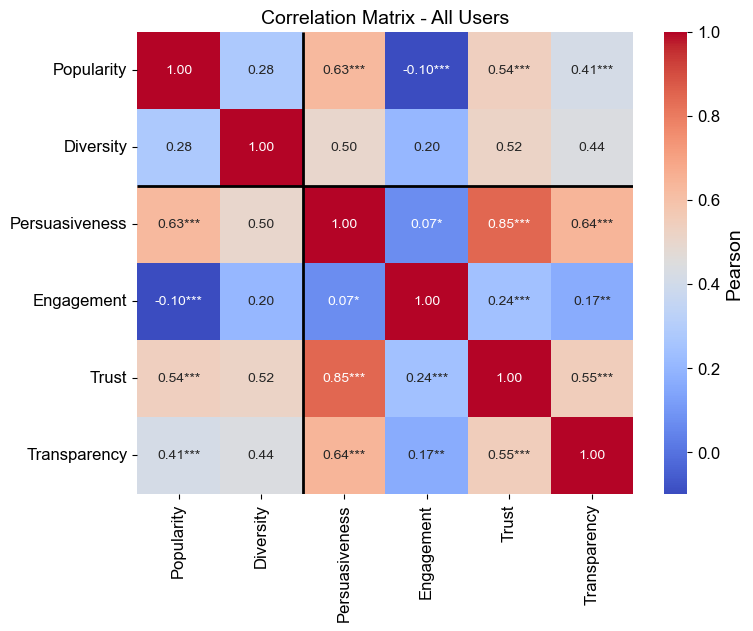

In [65]:
from scipy.stats import pearsonr, spearmanr

cols = df_res.columns
n = len(cols)
corrvals = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)
pvals = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)

# Compute Pearson correlation and p-values
for i in range(n):
    for j in range(i, n):
        r, p = pearsonr(df_res[cols[i]], df_res[cols[j]])
        corrvals.iloc[i,j] = r
        corrvals.iloc[j,i] = r  # symmetric
        pvals.iloc[i,j] = p
        pvals.iloc[j,i] = p  # symmetric

priority = ["Popularity", "Diversity"]
new_order = priority + [c for c in corr.columns if c not in priority]
corrvals = corrvals.loc[new_order, new_order]
annot = corrvals.round(2).astype(str)

for i in range(n):
    for j in range(n):
        p = pvals.iloc[i, j]
        r = corrvals.iloc[i, j]
        if i != j:
            stars = ""
            if p < 0.001:
                stars = "***"
            elif p < 0.01:
                stars = "**"
            elif p < 0.05:
                stars = "*"
            annot.iloc[i, j] = f"{r:.2f}{stars}"
        else:
            annot.iloc[i, j] = f"{r:.2f}"
# Plot
plt.figure(figsize=(8,6))
ax = sns.heatmap(corrvals, annot=annot, fmt="", cmap="coolwarm",
            cbar_kws={'label': 'Pearson'})

ax.hlines([2], *ax.get_xlim(), colors="black", linewidth=2)
ax.vlines([2], *ax.get_ylim(), colors="black", linewidth=2)

plt.title("Correlation Matrix - All Users")
plt.show()

In [66]:
print("P-value matrix:\n")
print(pvals)

P-value matrix:

                Persuasiveness  Engagement  Diversity    Popularity  \
Persuasiveness    0.000000e+00    0.606836   0.000106  2.795646e-07   
Engagement        6.068365e-01    0.000000   0.139021  4.703560e-01   
Diversity         1.057362e-04    0.139021   0.000000  4.102790e-02   
Popularity        2.795646e-07    0.470356   0.041028  0.000000e+00   
Trust             3.905421e-16    0.075786   0.000052  2.235303e-05   
Transparency      1.447038e-07    0.225649   0.000817  1.744149e-03   

                       Trust  Transparency  
Persuasiveness  3.905421e-16  1.447038e-07  
Engagement      7.578597e-02  2.256494e-01  
Diversity       5.173949e-05  8.165045e-04  
Popularity      2.235303e-05  1.744149e-03  
Trust           0.000000e+00  1.679136e-05  
Transparency    1.679136e-05  0.000000e+00  


In [67]:
results_repla = results_repla[results_repla.index.isin(ids)]
results_replb = results_replb.loc[results_replb.index.isin(ids)]

results_all_f = pd.concat([results_repla, results_replb])
results_all_f.columns = ['Persuasiveness', 'Engagement', 'Diversity', 'Popularity', 'Trust', 'Transparency']
results_all_f

,Persuasiveness,Engagement,Diversity,Popularity,Trust,Transparency
ID,,,,,,
8865717f-1ee0-4efb-a09b-e1173e28cf04,Equal,Equal,Equal,Equal,Equal,Equal
b4d1204b-42cf-4a56-b0f7-6813795a2923,Equal,Much More ExpLOD,More PEM,More PEM,More ExpLOD,More ExpLOD
42aab9b2-db24-421f-ace6-4564397942ae,More ExpLOD,More PEM,Equal,More PEM,More ExpLOD,More ExpLOD
1cf52f56-d06f-4f56-9b6c-3894edeb795b,More PEM,Equal,More PEM,More ExpLOD,More PEM,More PEM
26bbc9a9-86bb-4974-a1b5-6601b511ba4d,More ExpLOD,Equal,Equal,More ExpLOD,More ExpLOD,More ExpLOD
99a9b0db-5c2f-474a-b623-73b252e9ca1f,More PEM,Equal,More PEM,Equal,More PEM,Much More PEM
94cb0ad6-df69-4c3a-9df6-0d737a7c8add,More ExpLOD,More ExpLOD,More ExpLOD,More ExpLOD,More ExpLOD,More ExpLOD
bc9cb0c4-fd45-47d8-a975-5333691e2f9f,Much More ExpLOD,More PEM,More PEM,Much More ExpLOD,More ExpLOD,More ExpLOD
16497ee9-9f63-4ac3-8cba-ca821cd434cc,More PEM,More ExpLOD,More PEM,Equal,More ExpLOD,Much More PEM


In [68]:
df_res_f = results_all_f.replace(replace_v)
df_res_f

C:\Users\andre\AppData\Local\Temp\ipykernel_14100\211796878.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_res_f = results_all_f.replace(replace_v)


,Persuasiveness,Engagement,Diversity,Popularity,Trust,Transparency
ID,,,,,,
8865717f-1ee0-4efb-a09b-e1173e28cf04,0,0,0,0,0,0
b4d1204b-42cf-4a56-b0f7-6813795a2923,0,-2,1,1,-1,-1
42aab9b2-db24-421f-ace6-4564397942ae,-1,1,0,1,-1,-1
1cf52f56-d06f-4f56-9b6c-3894edeb795b,1,0,1,-1,1,1
26bbc9a9-86bb-4974-a1b5-6601b511ba4d,-1,0,0,-1,-1,-1
99a9b0db-5c2f-474a-b623-73b252e9ca1f,1,0,1,0,1,2
94cb0ad6-df69-4c3a-9df6-0d737a7c8add,-1,-1,-1,-1,-1,-1
bc9cb0c4-fd45-47d8-a975-5333691e2f9f,-2,1,1,-2,-1,-1
16497ee9-9f63-4ac3-8cba-ca821cd434cc,1,-1,1,0,-1,2


In [69]:
for c in results_all_f.columns:
    stats_rel(results_all_f, c)

Statistical Test for Persuasiveness
Wilcoxon statistic: 37.0
p-value: 0.3022523209701008
No significant preference (fail to reject H0)
----
Statistical Test for Engagement
Wilcoxon statistic: 30.5
p-value: 0.8127423725657857
No significant preference (fail to reject H0)
----
Statistical Test for Diversity
Wilcoxon statistic: 42.0
p-value: 0.46685427082272546
No significant preference (fail to reject H0)
----
Statistical Test for Popularity
Wilcoxon statistic: 37.0
p-value: 0.3022523209701008
No significant preference (fail to reject H0)
----
Statistical Test for Trust
Wilcoxon statistic: 45.5
p-value: 0.20632842497808102
No significant preference (fail to reject H0)
----
Statistical Test for Transparency
Wilcoxon statistic: 66.0
p-value: 0.9120671518304257
No significant preference (fail to reject H0)
----


C:\Users\andre\AppData\Local\Temp\ipykernel_14100\783916048.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(replace_v)


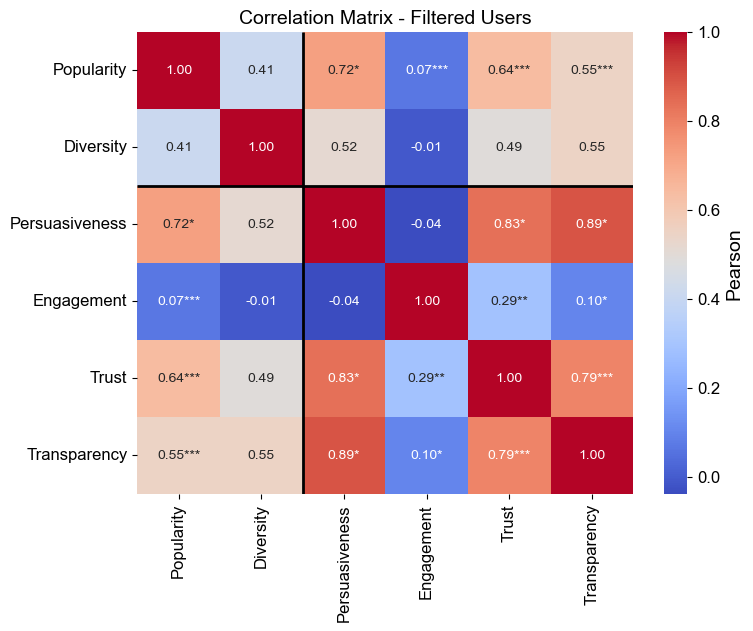

In [70]:
cols = df_res_f.columns
n = len(cols)
corrvals = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)
pvals = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)

# Compute Pearson correlation and p-values
for i in range(n):
    for j in range(i, n):
        r, p = pearsonr(df_res_f[cols[i]], df_res_f[cols[j]])
        corrvals.iloc[i,j] = r
        corrvals.iloc[j,i] = r  # symmetric
        pvals.iloc[i,j] = p
        pvals.iloc[j,i] = p  # symmetric

priority = ["Popularity", "Diversity"]
new_order = priority + [c for c in corr.columns if c not in priority]
corrvals = corrvals.loc[new_order, new_order]
annot = corrvals.round(2).astype(str)

for i in range(n):
    for j in range(n):
        p = pvals.iloc[i, j]
        r = corrvals.iloc[i, j]
        if i != j:
            stars = ""
            if p < 0.001:
                stars = "***"
            elif p < 0.01:
                stars = "**"
            elif p < 0.05:
                stars = "*"
            annot.iloc[i, j] = f"{r:.2f}{stars}"
        else:
            annot.iloc[i, j] = f"{r:.2f}"
# Plot
plt.figure(figsize=(8,6))
ax = sns.heatmap(corrvals, annot=annot, fmt="", cmap="coolwarm",
            cbar_kws={'label': 'Pearson'})

ax.hlines([2], *ax.get_xlim(), colors="black", linewidth=2)
ax.vlines([2], *ax.get_ylim(), colors="black", linewidth=2)

plt.title("Correlation Matrix - Filtered Users")
plt.show()

In [71]:
print("P-value matrix:\n")
print(pvals)

P-value matrix:

                Persuasiveness  Engagement  Diversity  Popularity  \
Persuasiveness    0.000000e+00    0.875855   0.023368    0.000466   
Engagement        8.758546e-01    0.000000   0.969422    0.788692   
Diversity         2.336773e-02    0.969422   0.000000    0.080061   
Popularity        4.657875e-04    0.788692   0.080061    0.000000   
Trust             8.958219e-06    0.231856   0.032845    0.002995   
Transparency      2.992324e-07    0.684292   0.014803    0.015224   

                        Trust   Transparency  
Persuasiveness   8.958219e-06   2.992324e-07  
Engagement       2.318565e-01   6.842925e-01  
Diversity        3.284539e-02   1.480339e-02  
Popularity       2.995201e-03   1.522361e-02  
Trust           2.200820e-129   5.807298e-05  
Transparency     5.807298e-05  6.078963e-132  
